# Churn Prediction Project

## 1. Introduction
- **Objective**: Predict customer churn using machine learning models.
- **Dataset Overview**: The dataset contains information about customers' behavior.

## 2. Imports and Setup

In [172]:
# Data manipulation and analysis libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries: preprocessing, model selection, and metrics
from sklearn.preprocessing import StandardScaler, LabelBinarizer, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, cross_validate
from sklearn.metrics import classification_report, make_scorer, roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import itertools

# Imbalanced dataset handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.pipeline import Pipeline



## 3. Data Loading and Cleaning

In [38]:
data = pd.read_csv('BankChurners.csv')

In [39]:
pd.set_option('display.max_columns', None)

In [40]:
data

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...     

In [41]:
print(data.describe())

          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

## 4. Exploratory Data Analysis (EDA)

In [84]:
attrition_counts = data['Attrition_Flag'].value_counts()

# Printing the count of each category
print(attrition_counts)

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


In [42]:
# Excluding categorical columns for analysis
analysis_df = pd.concat([data.loc[:, ['Customer_Age', 'Months_on_book']],
                        data.loc[:, 'Credit_Limit':'Avg_Utilization_Ratio']], axis=1).copy()

<Figure size 2000x2000 with 0 Axes>

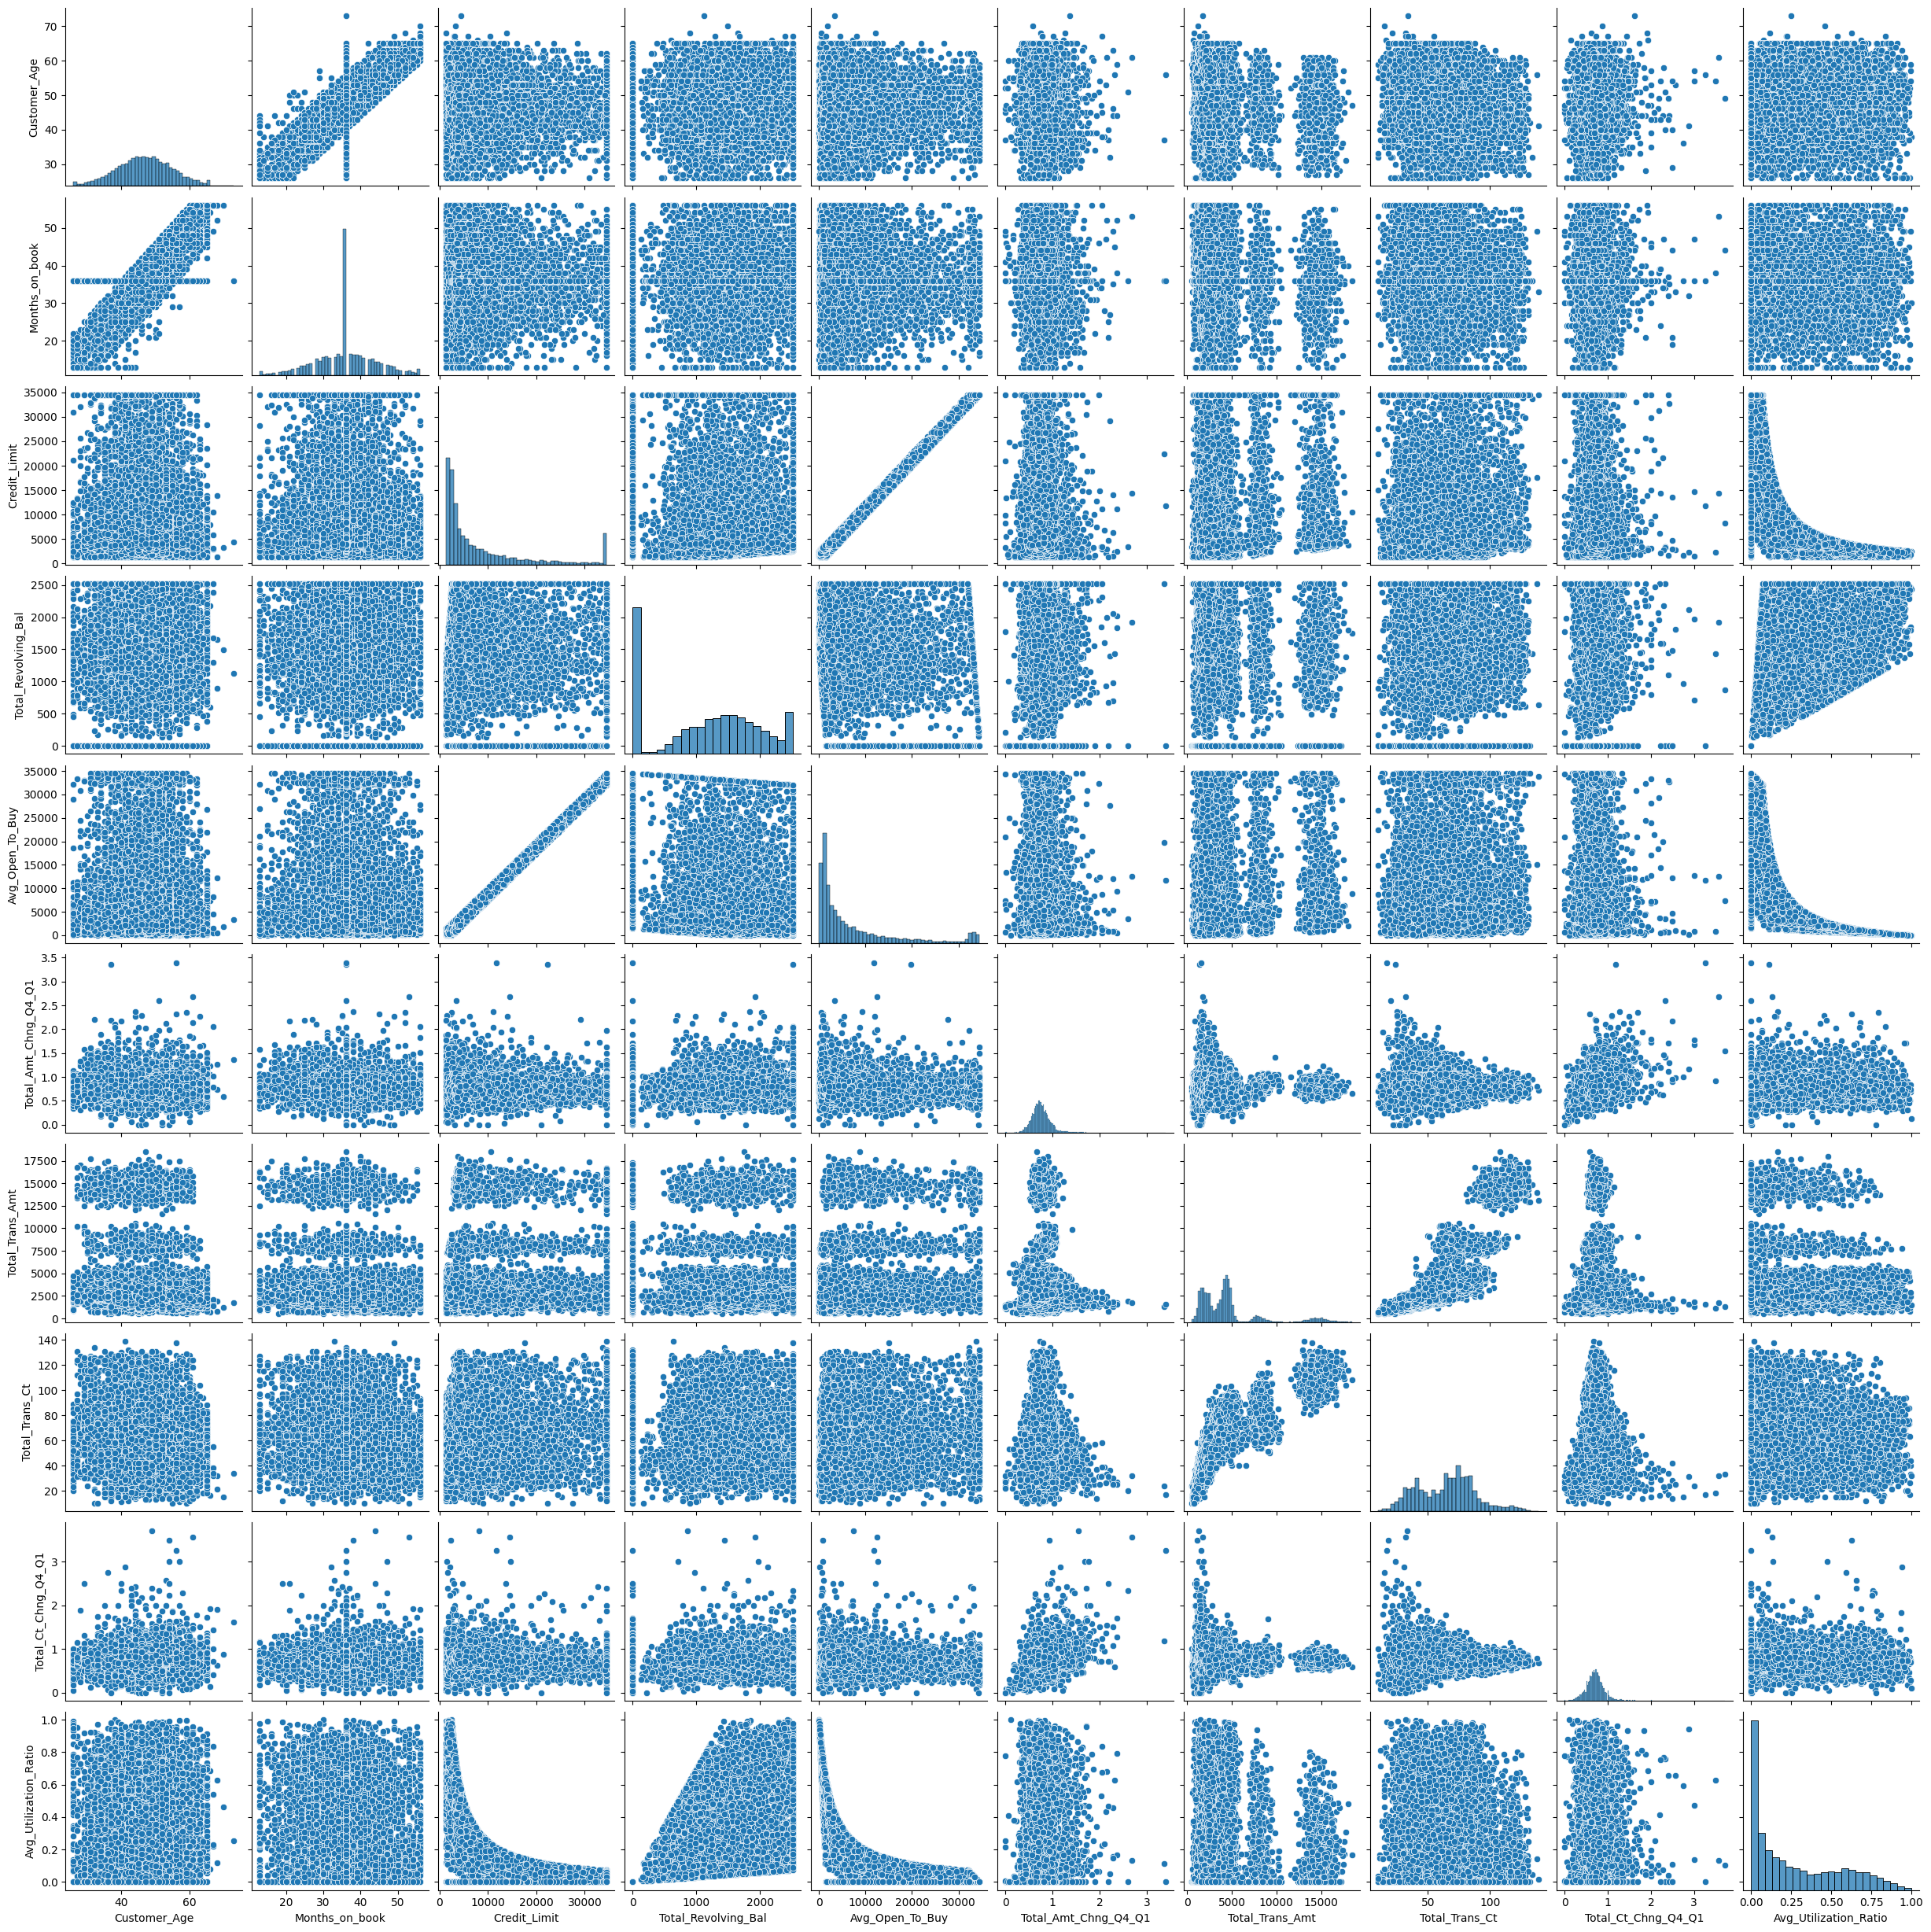

In [43]:
plt.figure(figsize=(20, 20))
sns.pairplot(analysis_df)
plt.show()

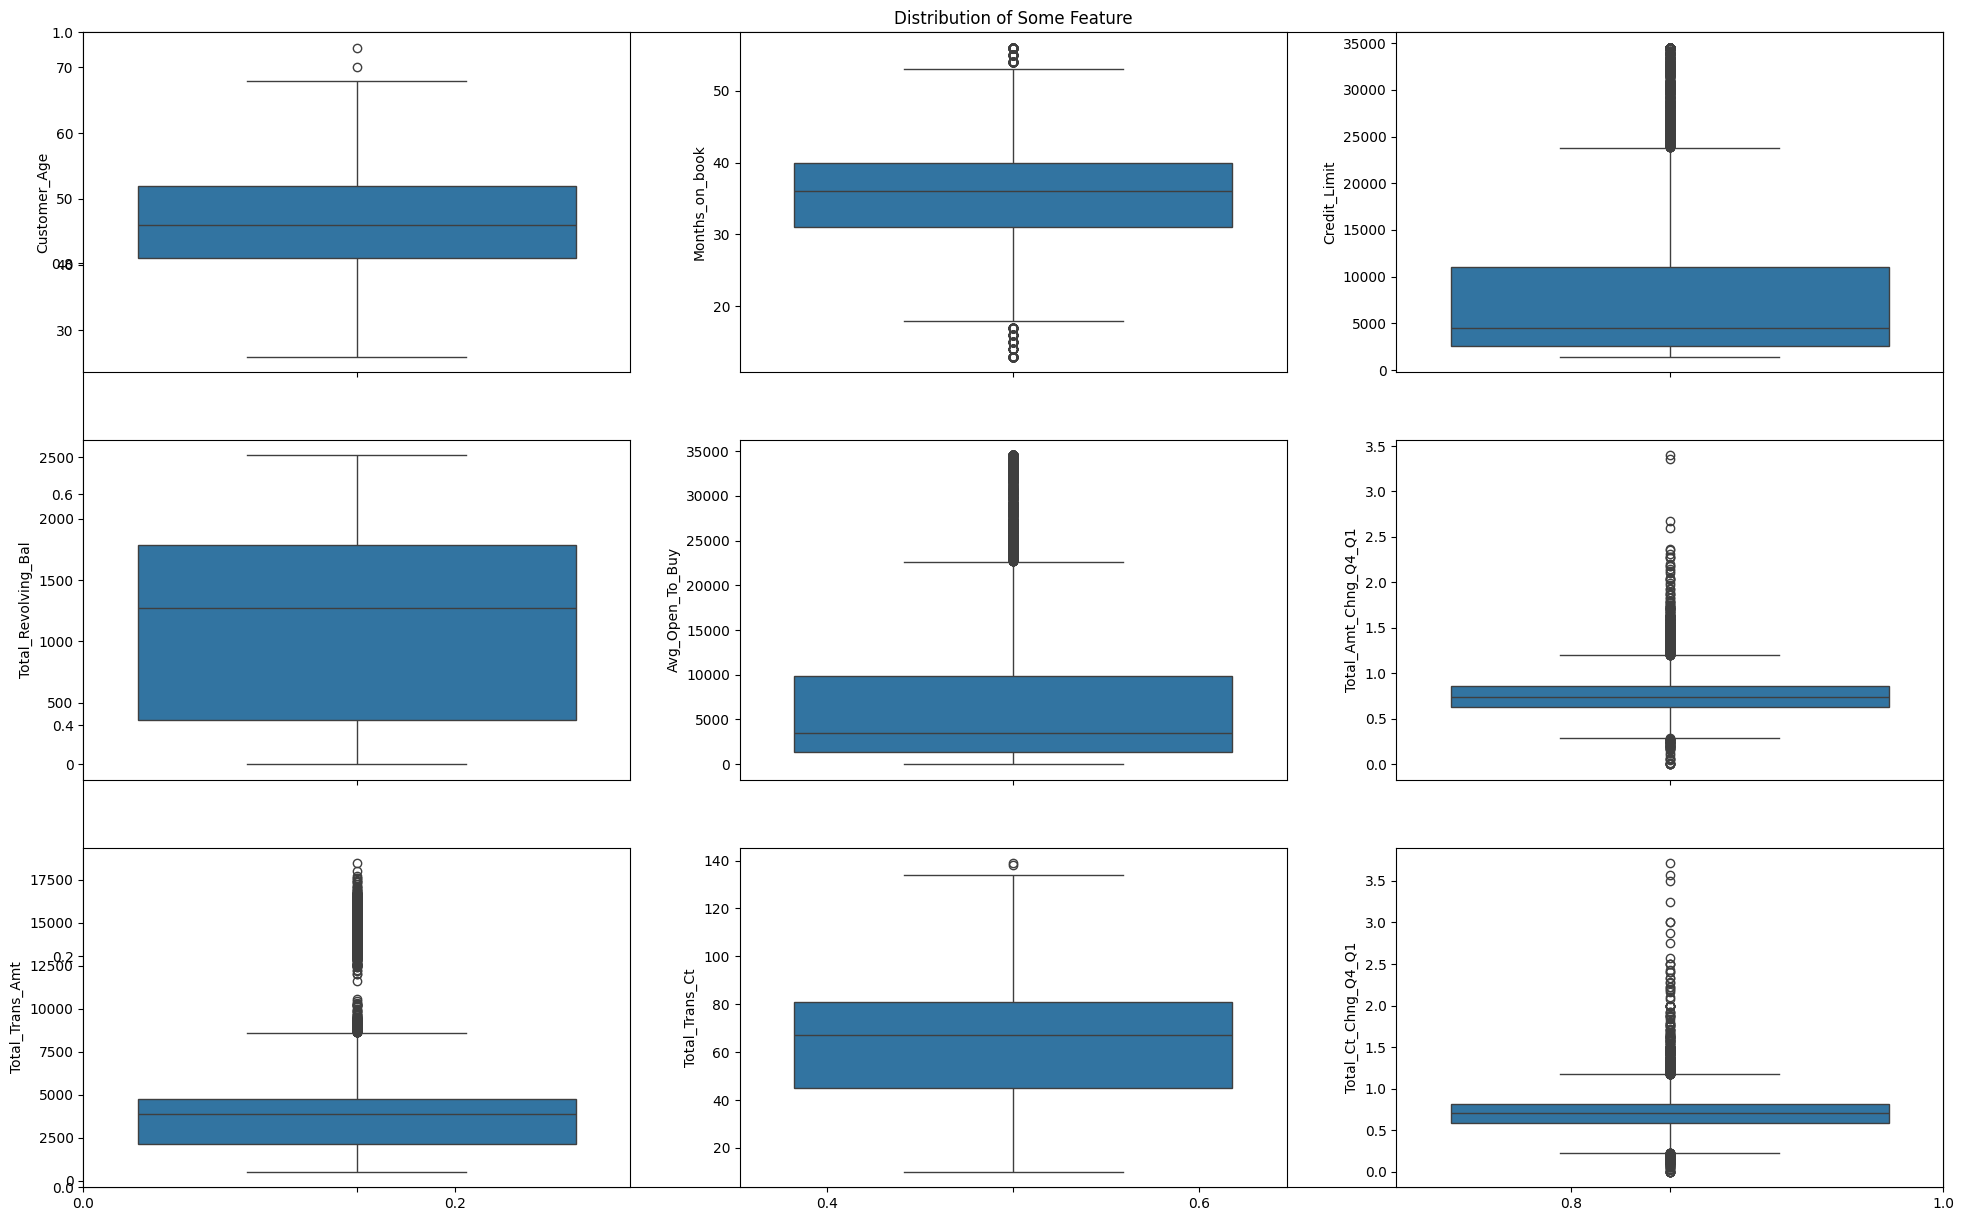

In [44]:
# Target distribution
plt.figure(figsize=(24, 15))

plt.title('Distribution of Some Feature')


for i in range(len(analysis_df.columns) - 1):

    plt.subplot(3, 3, i + 1)

    sns.boxplot(analysis_df[analysis_df.columns[i]])


plt.show()

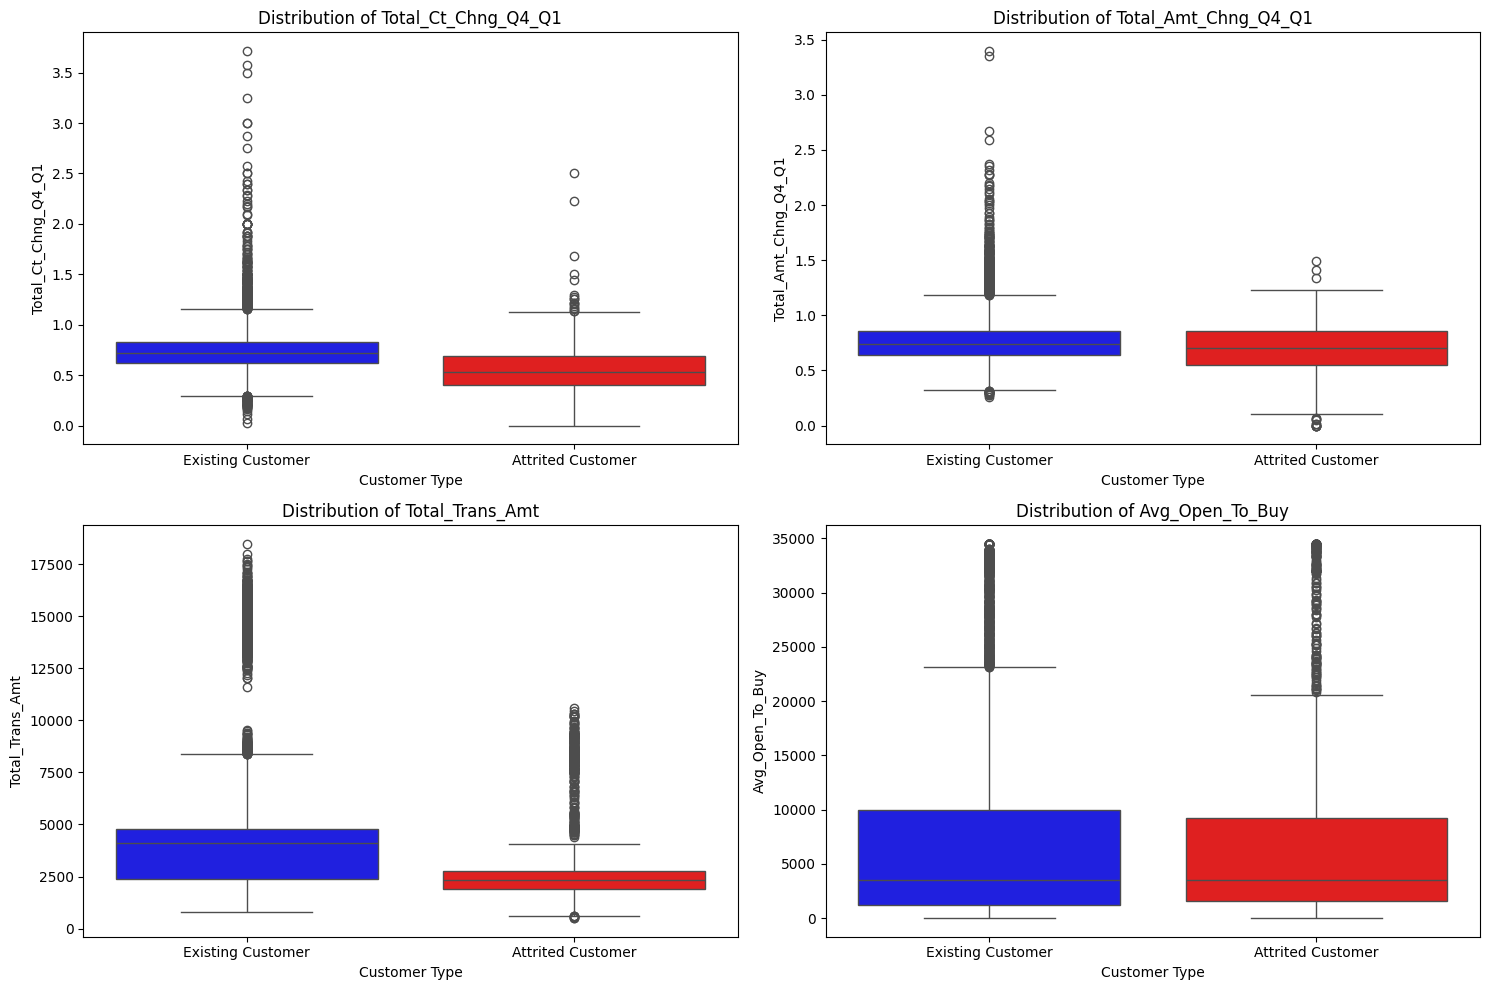

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the columns to plot
columns_to_plot = ['Total_Ct_Chng_Q4_Q1',
                   'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Avg_Open_To_Buy']

# Set the figure size for all plots
plt.figure(figsize=(15, 10))

# Create a box plot for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  # Adjust the layout based on the number of columns

    # Melt data to create a single dataset suitable for plotting
    subset_data = data[[column, 'Attrition_Flag']]

    # Define the palette for the groups
    palette_colors = {"Attrited Customer": "red", "Existing Customer": "blue"}

    # Create the box plot with seaborn
    sns.boxplot(x='Attrition_Flag', y=column, hue='Attrition_Flag',
                data=subset_data, palette=palette_colors, dodge=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Customer Type')
    plt.ylabel(column)
   
plt.tight_layout()
plt.show()

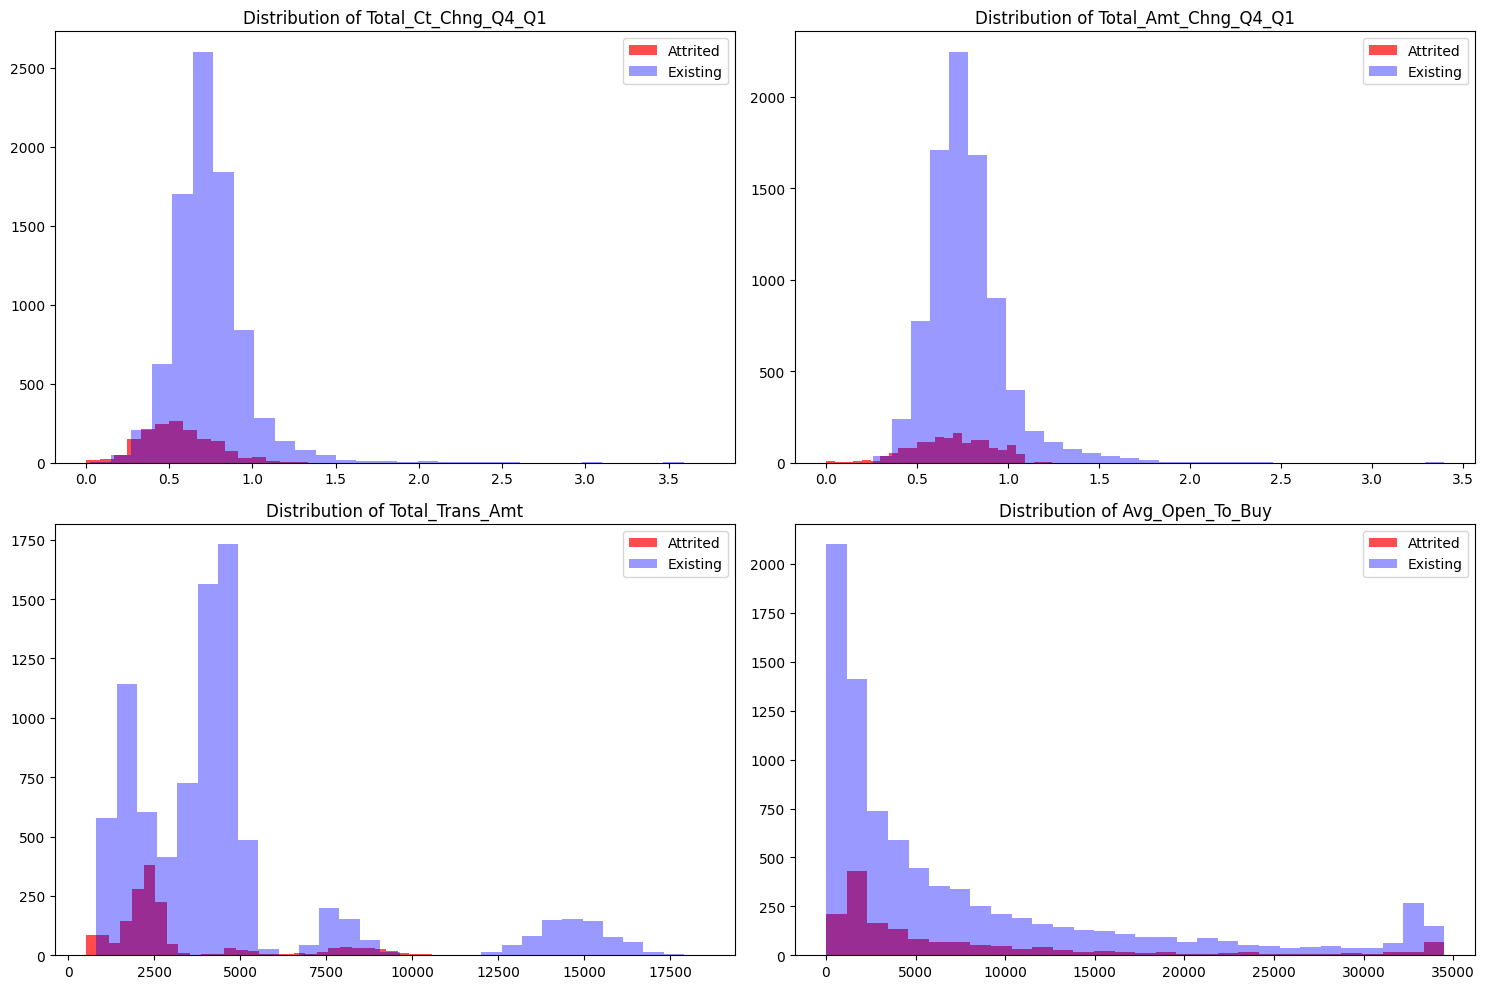

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame containing all the data
# Define the columns to plot
columns_to_plot = ['Total_Ct_Chng_Q4_Q1',
                   'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Avg_Open_To_Buy']

# Filter the DataFrame for Attrited Customers and Existing Customers
attrited_customers = data[data['Attrition_Flag'] == 'Attrited Customer']
existing_customers = data[data['Attrition_Flag'] == 'Existing Customer']

# Set the number of bins and figure size
bins = 30
plt.figure(figsize=(15, 10))

# Create a histogram for each column
for i, column in enumerate(columns_to_plot, 1):
    # This layout needs to be adjusted based on the number of columns
    plt.subplot(2, 2, i)
    plt.hist(attrited_customers[column], bins=bins,
             alpha=0.7, label='Attrited', color='red')
    plt.hist(existing_customers[column], bins=bins,
             alpha=0.4, label='Existing', color='blue')
    plt.title(f'Distribution of {column}')
   
    plt.legend()

plt.tight_layout()
plt.show()

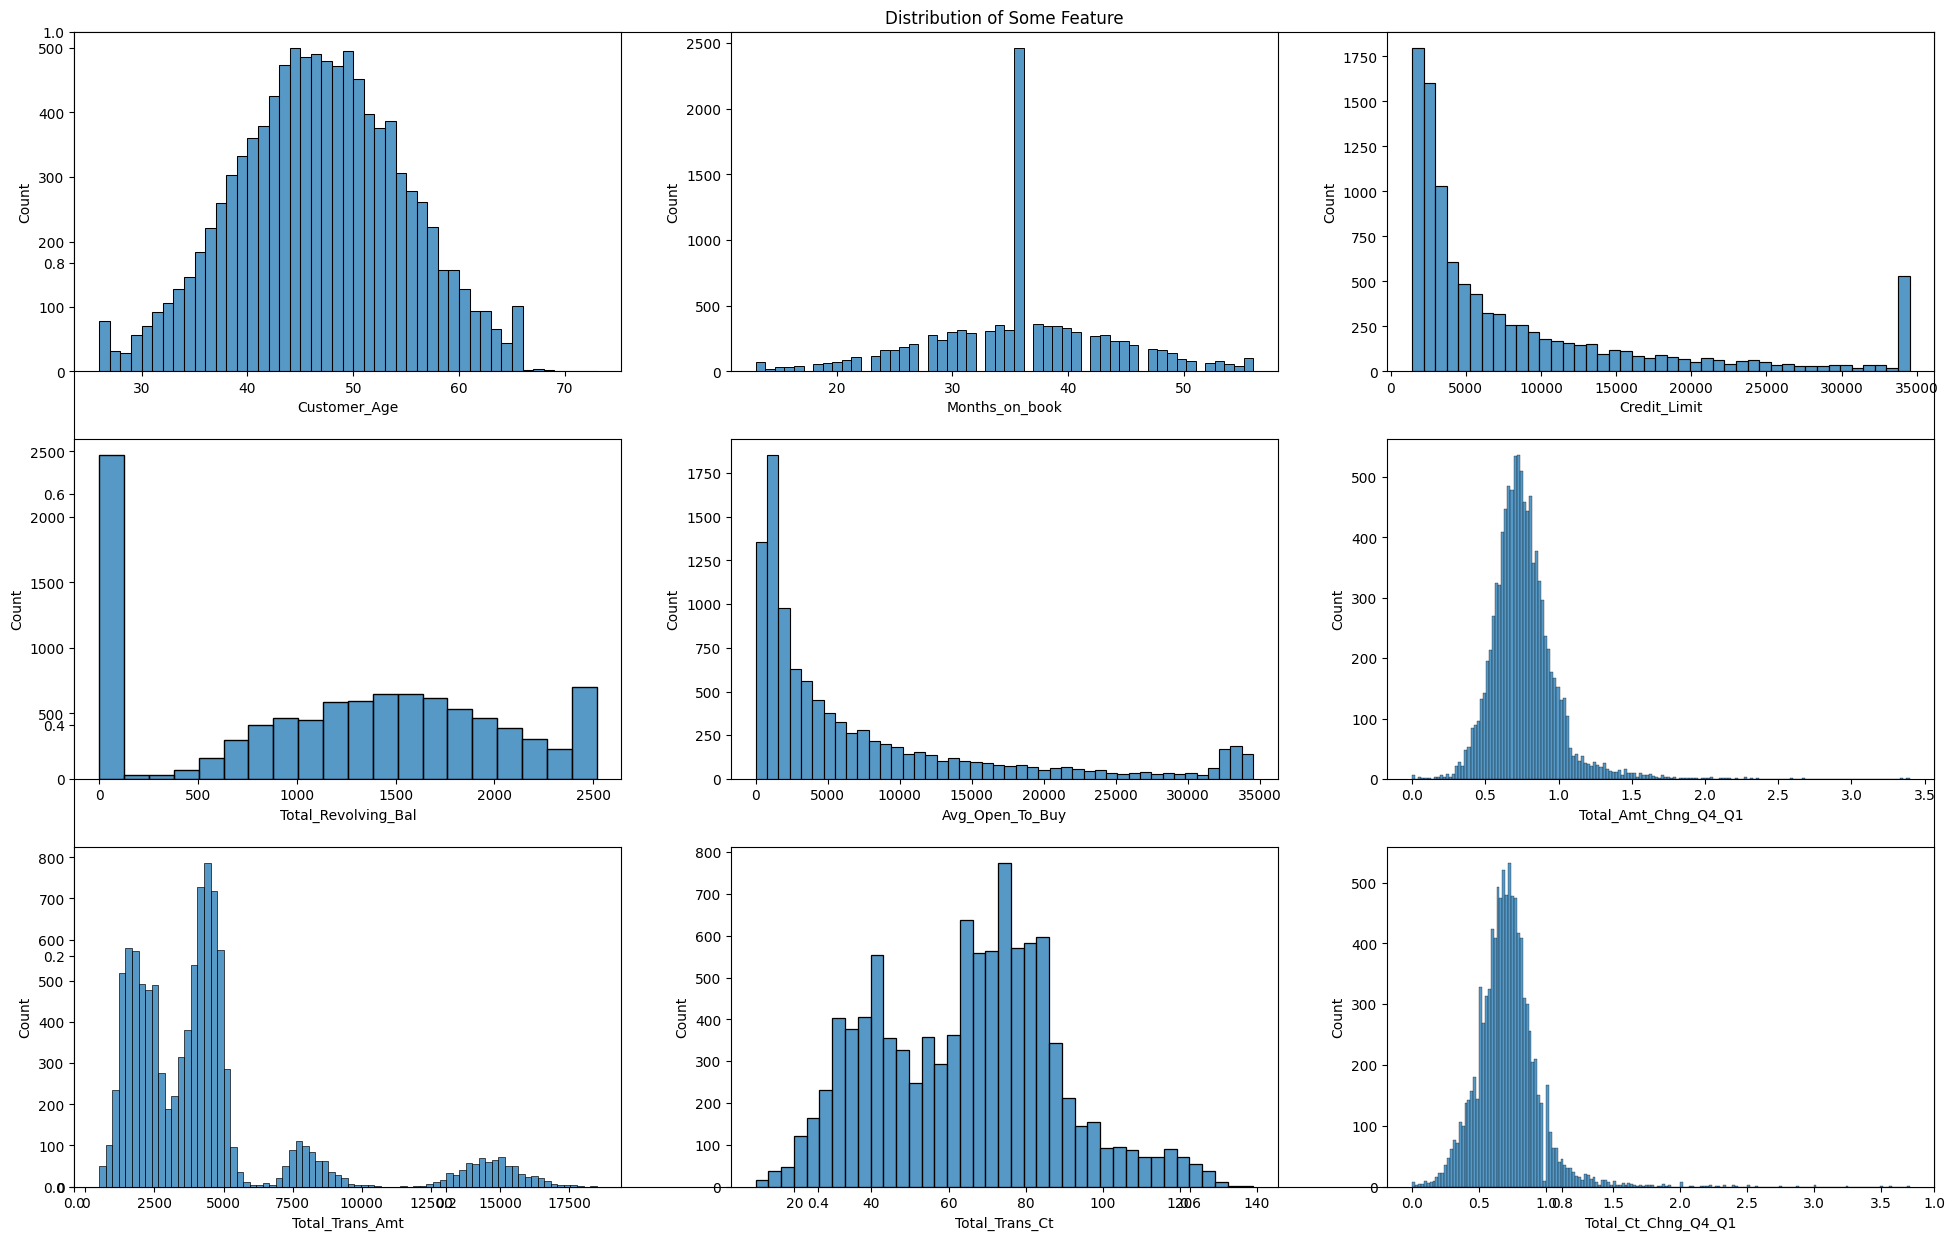

In [47]:
plt.figure(figsize=(24, 15))
plt.title('Distribution of Some Feature')
for i in range(len(analysis_df.columns) - 1):
    plt.subplot(3, 3, i + 1)
    sns.histplot(analysis_df[analysis_df.columns[i]])

plt.show()

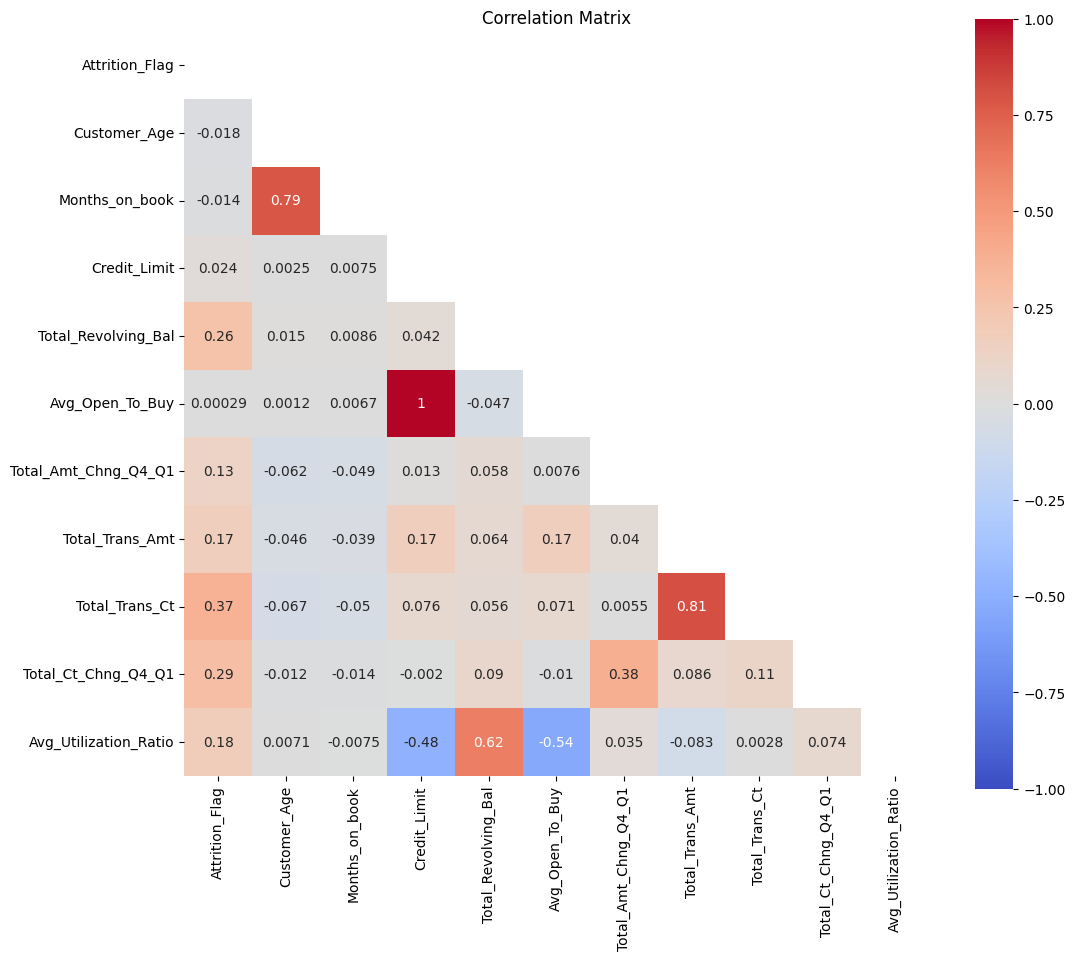

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Copying only the necessary columns
analysis_corr = pd.concat([data.loc[:, ['Attrition_Flag', 'Customer_Age', 'Months_on_book']],
                           data.loc[:, 'Credit_Limit':'Avg_Utilization_Ratio']], axis=1)

# Encoding the 'Attrition_Flag' column with Label Encoder
label_encoder = LabelEncoder()
analysis_corr['Attrition_Flag'] = label_encoder.fit_transform(
    analysis_corr['Attrition_Flag'])

# Calculating the correlation matrix
corr = analysis_corr.corr()

# Creating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, mask=mask, vmin=-1.0,
            vmax=1.0, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [49]:
data.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

## 5. Feature Engineering

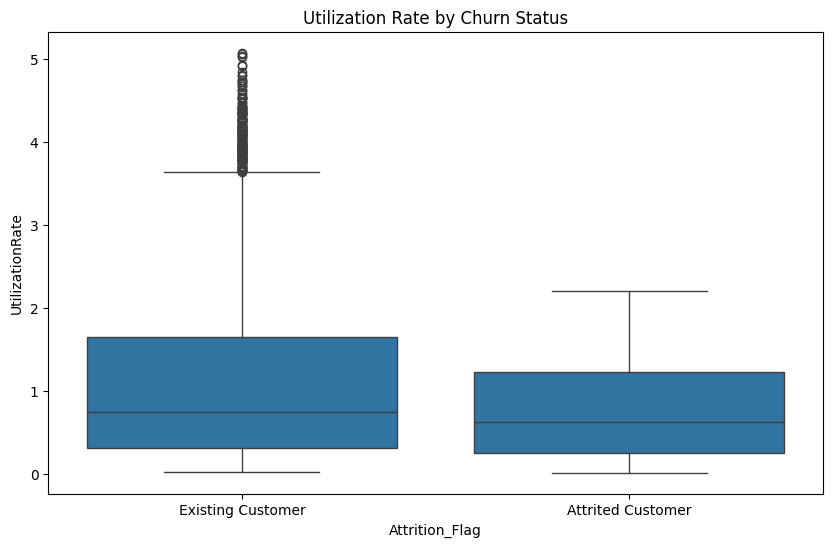

In [50]:
data['UtilizationRate'] = data['Total_Trans_Amt'] / data['Credit_Limit']
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='UtilizationRate', data=data)
plt.title('Utilization Rate by Churn Status')
plt.show()

In [52]:
{column: list(data[column].unique())
 for column in data.select_dtypes('object').columns}

{'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
 'Gender': ['M', 'F'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']}

In [133]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop last two columns
    df = df.drop(df.columns[-3:-1], axis=1)

    # Ensure that 'Attrition_Flag' is present
    if 'Attrition_Flag' not in df.columns:
        raise KeyError("Column 'Attrition_Flag' not found in DataFrame")

    # Drop columns
    columns_to_drop = ['CLIENTNUM']
    df.drop(columns_to_drop, axis=1, inplace=True)

    # Replace 'Unknown' with np.NaN
    df.replace('Unknown', np.nan, inplace=True)

    # Define ordering for ordinal encoding
    education_ordering = ['Uneducated', 'High School',
                          'College', 'Graduate', 'Post-Graduate', 'Doctorate']
    income_ordering = ['Less than $40K', '$40K - $60K',
                       '$60K - $80K', '$80K - $120K', '$120K +']

    # Separate target before any column manipulation
    y = df['Attrition_Flag']
    df = df.drop('Attrition_Flag', axis=1)

    # Preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('impute_then_encode', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('ordinal', OrdinalEncoder(categories=[
                 education_ordering, income_ordering]))
            ]), ['Education_Level', 'Income_Category']),
            ('binary', Pipeline([
                ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
                # Adjusted to drop 'if_binary' to handle binary encoding
                ('binarizer', OneHotEncoder(drop='if_binary'))
            ]), ['Gender']),
            ('onehot', OneHotEncoder(), ['Marital_Status', 'Card_Category'])
        ],
        remainder='passthrough'
    )

   # Fit and transform the data
    X_transformed = preprocessor.fit_transform(df)

    # Convert transformed X back to DataFrame to apply scaling
    columns = preprocessor.get_feature_names_out()
    X_transformed = pd.DataFrame(X_transformed, columns=columns)

    # Scaling all features
    scaler = StandardScaler()
    X = scaler.fit_transform(X_transformed)
    X = pd.DataFrame(X, columns=columns)

    # Convert y to binary using LabelBinarizer
    y = LabelBinarizer().fit_transform(y.to_numpy())
    y = y.ravel()  # Convert from a 2D array to a 1D array

    return X, y

In [134]:
X, y = preprocess_inputs(data)


In [136]:
original_y = data['Attrition_Flag']
lb = LabelBinarizer()

# Fit the LabelBinarizer to the original target variable
lb.fit(original_y)

# Transform the original labels to see their binary equivalents
transformed_labels = lb.transform(lb.classes_)

# Create a dictionary to see which label is associated with which binary value
label_mapping = {label: binary[0] for label,
                 binary in zip(lb.classes_, transformed_labels)}

print("Label Mapping:", label_mapping)

Label Mapping: {'Attrited Customer': 0, 'Existing Customer': 1}


In [135]:
X

impute_then_encode__Education_Level  \
0                                -0.893680   
1                                 0.593388   
2                                 0.593388   
3                                -0.893680   
4                                -1.637214   
...                                    ...   
10122                             0.593388   
10123                             0.593388   
10124                            -0.893680   
10125                             0.593388   
10126                             0.593388   

       impute_then_encode__Income_Category  binary__Gender_M  \
0                                 0.597300          1.059956   
1                                -0.887628         -0.943436   
2                                 1.339764          1.059956   
3                                -0.887628         -0.943436   
4                                 0.597300          1.059956   
...                                    ...               ...   
10122                            -0.145164          1.059956   
10123                            -0.145164          1.059956   
10124                            -0.887628         -0.943436   
10125                            -0.145164          1.059956   
10126                            -0.887628         -0.943436   

       onehot__Marital_Status_Divorced  onehot__Marital_Status_Married  \
0                            -0.282405                        1.077338   
1                            -0.282405                       -0.928214   
2                            -0.282405                        1.077338   
3                            -0.282405                       -0.928214   
4                            -0.282405                        1.077338   
...                                ...                             ...   
10122                        -0.282405                       -0.928214   
10123                         3.541013                       -0.928214   
10124                        -0.282405                        1.077338   
10125                        -0.282405                       -0.928214   
10126                        -0.282405                        1.077338   

       onehot__Marital_Status_Single  onehot__Marital_Status_nan  \
0                          -0.798507                   -0.282609   
1                           1.252337                   -0.282609   
2                          -0.798507                   -0.282609   
3                          -0.798507                    3.538459   
4                          -0.798507                   -0.282609   
...                              ...                         ...   
10122                       1.252337                   -0.282609   
10123                      -0.798507                   -0.282609   
10124                      -0.798507                   -0.282609   
10125                      -0.798507                    3.538459   
10126                      -0.798507                   -0.282609   

       onehot__Card_Category_Blue  onehot__Card_Category_Gold  \
0                        0.270611                   -0.107644   
1                        0.270611                   -0.107644   
2                        0.270611                   -0.107644   
3                        0.270611                   -0.107644   
4                        0.270611                   -0.107644   
...                           ...                         ...   
10122                    0.270611                   -0.107644   
10123                    0.270611                   -0.107644   
10124                    0.270611                   -0.107644   
10125                    0.270611                   -0.107644   
10126                   -3.695345                   -0.107644   

       onehot__Card_Category_Platinum  onehot__Card_Category_Silver  \
0                           -0.044484                     -0.240794   
1                           -0.044484                   

In [137]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [138]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.3, random_state=42, stratify=y)

In [139]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [140]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

for model in models:
    model.fit(X_train, y_train)

In [145]:
model_names = [
    "   Logistic Regression",
    "Support Vector Machine",
    "         Decision Tree",
    "         Random Forest"
]

# Loop through each model, fit it on the resampled training data, and evaluate on the test set
for model, name in zip(models, model_names):
    # Fit the model to the resampled training data
    model.fit(X_train_resampled, y_train_resampled)

    # Calculate the score on the test data
    score = model.score(X_test, y_test) * 100  # Convert score to percentage

    # Print the model name and its score formatted to 4 decimal places
    print(f"{name}: {score:.4f}%")


   Logistic Regression: 86.2322%
Support Vector Machine: 91.0425%
         Decision Tree: 91.6349%
         Random Forest: 95.0628%


In [146]:
for model, name in zip(models, model_names):
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

   Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.83      0.66      1139
           1       0.96      0.87      0.91      5950

    accuracy                           0.86      7089
   macro avg       0.76      0.85      0.79      7089
weighted avg       0.90      0.86      0.87      7089

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.82      0.75      1139
           1       0.96      0.93      0.95      5950

    accuracy                           0.91      7089
   macro avg       0.82      0.87      0.85      7089
weighted avg       0.92      0.91      0.91      7089

         Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.76      1139
           1       0.97      0.93      0.95      5950

    accuracy                           0.92 

Feature ranking:
1. feature remainder__Total_Trans_Ct (0.2251)
2. feature remainder__Total_Trans_Amt (0.1531)
3. feature remainder__Total_Ct_Chng_Q4_Q1 (0.1192)
4. feature remainder__Total_Revolving_Bal (0.0845)
5. feature remainder__Months_Inactive_12_mon (0.0603)
6. feature remainder__Avg_Utilization_Ratio (0.0518)
7. feature remainder__Total_Relationship_Count (0.0487)
8. feature remainder__Total_Amt_Chng_Q4_Q1 (0.0409)
9. feature remainder__UtilizationRate (0.0345)
10. feature remainder__Contacts_Count_12_mon (0.0330)
11. feature remainder__Customer_Age (0.0273)
12. feature remainder__Avg_Open_To_Buy (0.0222)
13. feature remainder__Months_on_book (0.0200)
14. feature remainder__Credit_Limit (0.0178)
15. feature remainder__Dependent_count (0.0175)
16. feature impute_then_encode__Income_Category (0.0118)
17. feature impute_then_encode__Education_Level (0.0114)
18. feature binary__Gender_M (0.0061)
19. feature onehot__Marital_Status_Married (0.0041)
20. feature onehot__Marital_Status_

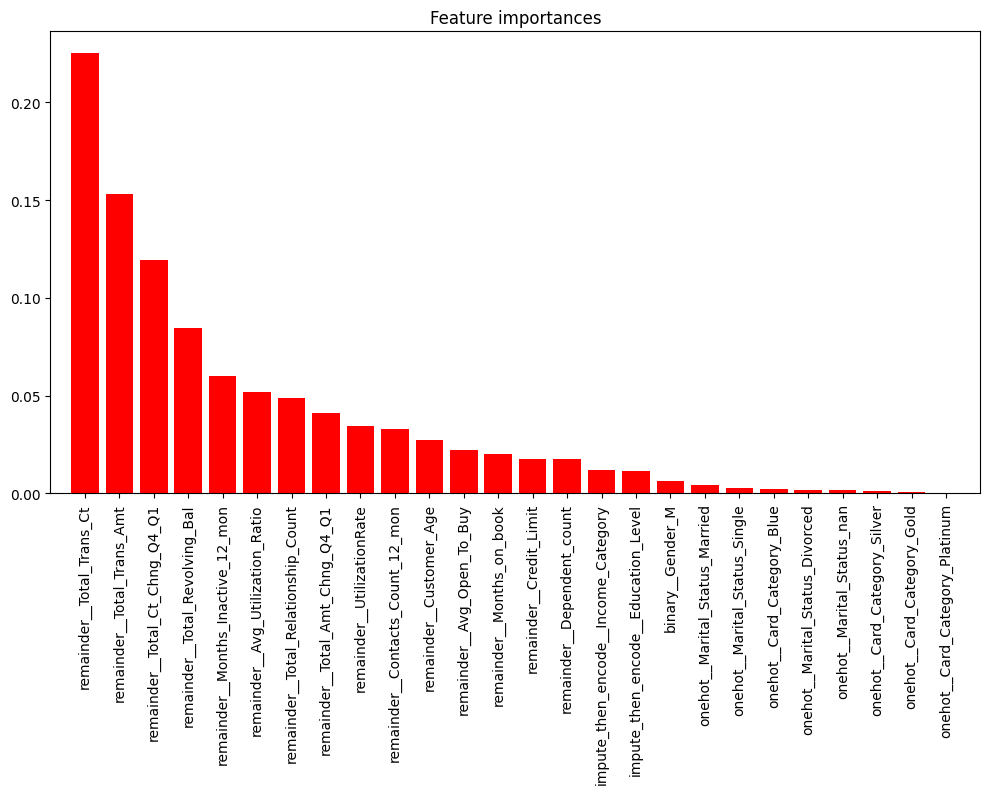

In [147]:
random_forest = models[3]
feature_importances = random_forest.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Summarize feature importances
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(
        f"{f + 1}. feature {X_train.columns[indices[f]]} ({feature_importances[indices[f]]:.4f})")

# Plot the feature importances of the forest
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [154]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluates a given model on the test set and prints the classification report.
    Also plots the ROC curve.

    Parameters:
    - model: The trained machine learning model.
    - X_test: Test features.
    - y_test: True labels for the test data.
    """

    # Prediction and Classification Report
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Compute probabilities for the positive class
    y_probs = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC Curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1139
           1       0.97      0.97      0.97      5950

    accuracy                           0.95      7089
   macro avg       0.91      0.91      0.91      7089
weighted avg       0.95      0.95      0.95      7089



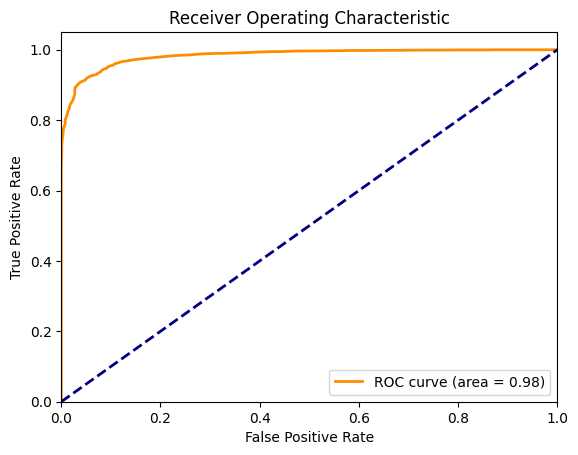

In [157]:
random_forest_model=models[3]
evaluate_model(random_forest_model, X_test, y_test)

In [151]:
# Initialize RandomForest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Setup cross-validation
# 5-fold cross-validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Perform cross-validation
cv_scores = cross_val_score(random_forest, X, y, cv=kf, scoring='recall')

# Print results
print("CV Scores:", cv_scores)
print("CV Mean Score:", np.mean(cv_scores))
print("CV Standard Deviation:", np.std(cv_scores))

CV Scores: [0.98646263 0.98640662 0.98542274 0.98995272 0.98766157]
CV Mean Score: 0.9871812556555831
CV Standard Deviation: 0.0015569573089716092


In [153]:
cv_results = cross_validate(random_forest, X, y, cv=kf,
                            scoring=['accuracy', 'precision', 'recall'])

# Output results
print("Detailed Cross-Validation Results:")
print(cv_results)

Detailed Cross-Validation Results:
{'fit_time': array([1.28861165, 1.12450004, 1.18390155, 1.22417188, 1.1732924 ]), 'score_time': array([0.02262044, 0.01980376, 0.01904106, 0.02081561, 0.01963472]), 'test_accuracy': array([0.95853899, 0.95705824, 0.96246914, 0.96790123, 0.9654321 ]), 'test_precision': array([0.96488198, 0.96306982, 0.97070649, 0.97214161, 0.9716763 ]), 'test_recall': array([0.98646263, 0.98640662, 0.98542274, 0.98995272, 0.98766157])}


In [176]:
def tune_and_evaluate(X_train, y_train, X_test, y_test):
    # Define the parameter grid to search
    param_grid = {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': ['sqrt', 'log2']
    }

    # Define scoring
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted')
    }

    # Create a pipeline that first applies SMOTE and then fits a RandomForest classifier
    pipeline = ImPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Initialize GridSearchCV with the pipeline
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5,
                               scoring=scoring, verbose=1, n_jobs=-1, refit='recall')

    # Perform grid search on the original unresampled training data
    grid_search.fit(X_train, y_train)

    # Print best parameters and best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    # Use the best estimator to make predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Evaluate the predictions
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
# Call the function
# Assume X_train, y_train, X_test, y_test are defined
tune_and_evaluate(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Score: 0.9437158588398509
Precision: 0.9518475648149157
Recall: 0.9516151784454789
F1-score: 0.9517259977416924
Confusion Matrix:
[[ 974  165]
 [ 178 5772]]


Confusion matrix, without normalization
[[ 974  165]
 [ 178 5772]]


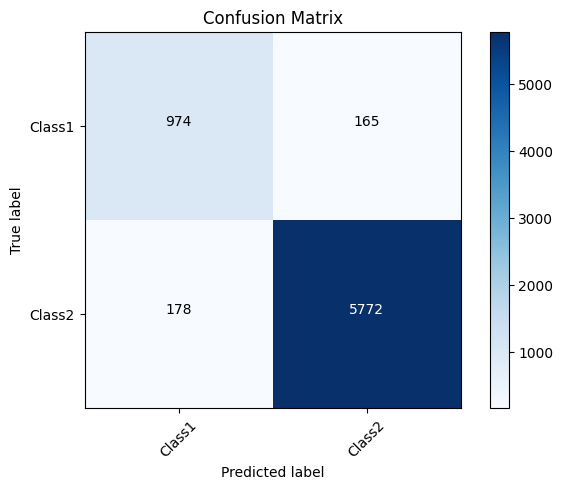

In [168]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    


# Call function with confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, classes=['Class1', 'Class2'],
                      title='Confusion Matrix')

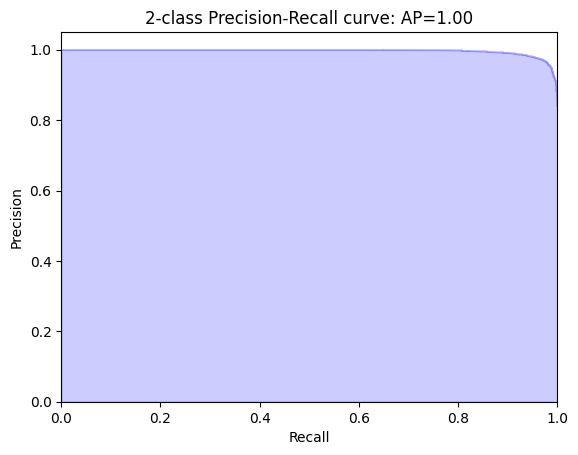

In [175]:

best_rf_classifier = grid_search.best_estimator_

# Generate probability predictions
y_pred_proba = best_rf_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
plt.show()